## Chapter 6 In-chapter Examples

In [2]:
# import libraries and define global settings
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

# define global figure properties used for publication
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'savefig.dpi':300,          # output resolution
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })
     


### Z-score

In [3]:
X = [ 1,4,-5,2,1 ]

mu = np.mean(X)
sigma = np.std(X,ddof=1)

X_z = (X-mu) / sigma
print(X_z)

[ 0.11899282  1.011439   -1.66589953  0.41647488  0.11899282]


In [4]:
print(f'       Original | z-transformed')
print(f'Mean:      {np.mean(X):.2f} | {np.mean(X_z):.2f}')
print(f'stdev:     {np.std(X,ddof=1):.2f} | {np.std(X_z,ddof=1):.2f}')

       Original | z-transformed
Mean:      0.60 | -0.00
stdev:     3.36 | 1.00


### Fig 6.1: Example distributions of height and weight

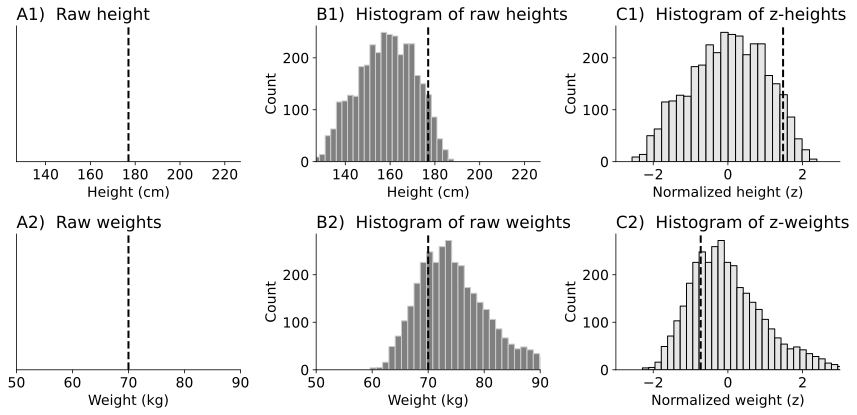

In [6]:
# fake heights and weights, in units of cm and kg
N = 3425
height = np.arctanh(np.random.uniform(-.9,.8,size=N)) * 20 + 160 + np.random.randn(N)*3
weight = np.arctanh(np.random.uniform(-.3,.99,size=N)) * 10 +  70 + np.random.randn(N)*3

# our imaginary individual
ind_height = 177
ind_weight = 70



# z-score the distributions
height_z = (height-np.mean(height)) / np.std(height,ddof=1)
weight_z = (weight-np.mean(weight)) / np.std(weight,ddof=1)

# z-score the individual
ind_height_z = (ind_height-np.mean(height)) / np.std(height,ddof=1)
ind_weight_z = (ind_weight-np.mean(weight)) / np.std(weight,ddof=1)




# figure layout
_,axs = plt.subplots(2,3,figsize=(12,6))

# plot the values
axs[0,0].axvline(ind_height,color='k',linestyle='--',linewidth=2)
axs[0,0].set(xlabel='Height (cm)',yticks=[],xlim=[ind_height-50,ind_height+50])
axs[0,0].set_title(r'A1)  Raw height')

axs[1,0].axvline(ind_weight,color='k',linestyle='--',linewidth=2)
axs[1,0].set(xlabel='Weight (kg)',yticks=[],xlim=[ind_weight-20,ind_weight+20])
axs[1,0].set_title(r'A2)  Raw weights')



# plot the raw distributions with the individual
axs[0,1].hist(height,bins='fd',color=(.5,.5,.5),edgecolor=(.8,.8,.8))
axs[0,1].axvline(ind_height,color='k',linestyle='--',linewidth=2)
axs[0,1].set(xlabel='Height (cm)',ylabel='Count',xlim=[ind_height-50,ind_height+50])
axs[0,1].set_title(r'B1)  Histogram of raw heights')

axs[1,1].hist(weight,bins='fd',color=(.5,.5,.5),edgecolor=(.8,.8,.8))
axs[1,1].axvline(ind_weight,color='k',linestyle='--',linewidth=2)
axs[1,1].set(xlabel='Weight (kg)',ylabel='Count',xlim=[ind_weight-20,ind_weight+20])
axs[1,1].set_title(r'B2)  Histogram of raw weights')



# plot the z-normalized distributions
axs[0,2].hist(height_z,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[0,2].axvline(ind_height_z,color='k',linestyle='--',linewidth=2)
axs[0,2].set(xlabel='Normalized height (z)',ylabel='Count',xlim=[-3,3])
axs[0,2].set_title(r'C1)  Histogram of z-heights')

axs[1,2].hist(weight_z,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[1,2].axvline(ind_weight_z,color='k',linestyle='--',linewidth=2)
axs[1,2].set(xlabel='Normalized weight (z)',ylabel='Count',xlim=[-3,3])
axs[1,2].set_title(r'C2)  Histogram of z-weights')


# show plot
plt.tight_layout()
plt.show()

### Fig 6.2: Z-scoring preserves relative values

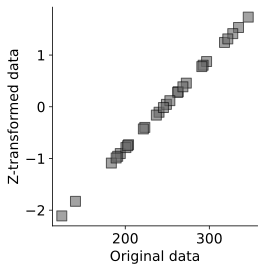

In [7]:
x = np.random.normal(250,58,size=28)
zx = (x-np.mean(x)) / np.std(x,ddof=1)


plt.figure(figsize=(4,4))
plt.plot(x,zx,'ks',markersize=10,markerfacecolor=(.4,.4,.4),alpha=.6)
plt.xlabel('Original data')
plt.ylabel('Z-transformed data')

plt.tight_layout()
plt.show()

### Fig 6.3: Z-scoring a non-normal distribution

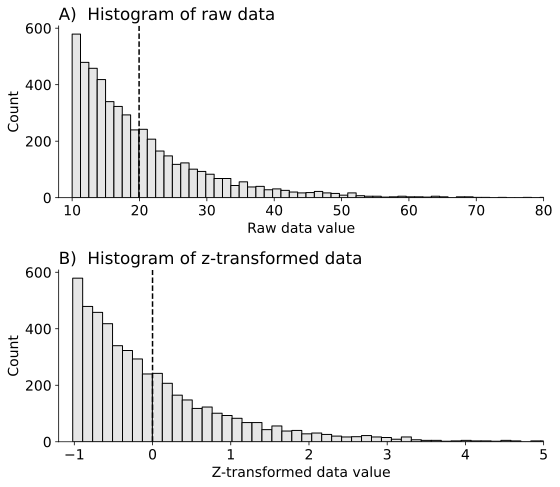

In [8]:
N = 5000
X = (1+np.random.exponential(size=N))*10
Xz = (X-np.mean(X)) / np.std(X,ddof=1)

_,axs = plt.subplots(2,1,figsize=(8,7))
axs[0].hist(X,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[0].axvline(np.mean(X),color='k',linestyle='--')
axs[0].set(xlabel='Raw data value',ylabel='Count',xlim=[8,80])
axs[0].set_title(r'A)  Histogram of raw data')

axs[1].hist(Xz,bins='fd',color=(.9,.9,.9),edgecolor='k')
axs[1].axvline(np.mean(Xz),color='k',linestyle='--')
axs[1].set(xlabel='Z-transformed data value',ylabel='Count',xlim=[-1.2,5])
axs[1].set_title(r'B)  Histogram of z-transformed data')


plt.tight_layout()
plt.show()